<a href="https://colab.research.google.com/github/Aaryant31/Book_Recommendation_system/blob/main/Rahul_Kumar_Soni_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Book Recommendation System </u></b>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## <b> Content </b>

The Book-Crossing dataset comprises 3 files.

##**Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

##**Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

##**Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, *expressed* on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0. 

# **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading Books Data
book_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Book Recommender System/DAT/Books.csv')
#viewing first 5 row of book data
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
#Check Columns
book_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [6]:
# Users data
users_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Book Recommender System/DAT/Users.csv')
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
# laoding Ratings Data
ratings_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Book Recommender System/DAT/Ratings.csv')
#viewing first 5 row of Rating Data
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
#Shape of Books data
print(book_df.shape)

(271360, 8)


In [9]:
#Shape of users data
print(users_df.shape)

(278858, 3)


In [10]:
#Shape of ratings data
print(ratings_df.shape)

(1149780, 3)


# **Exploratory Data Analysis**

**Book Title**

In [11]:
#Describing title Book Data
book_df['Book-Title'].describe()

count             271360
unique            242135
top       Selected Poems
freq                  27
Name: Book-Title, dtype: object

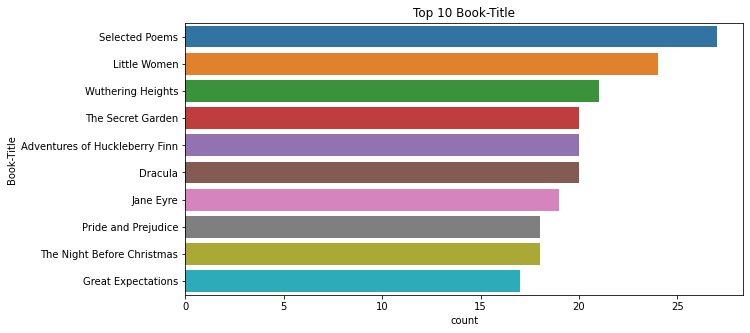

In [12]:
#ploting top 10 book title
plt.figure(figsize=(10,5))
sns.countplot(y='Book-Title',data=book_df, order=pd.value_counts(book_df['Book-Title']).iloc[:10].index)
plt.title('Top 10 Book-Title')
plt.show()

Observation
* We have 2,42,130 unique Book Title.
* The top most book title found is Selected Poems.
* Selected Poems is present in 27 rows in books data.

**Book Author**

In [13]:
#decribing auther of book data
book_df['Book-Author'].describe()

count              271359
unique             102023
top       Agatha Christie
freq                  632
Name: Book-Author, dtype: object

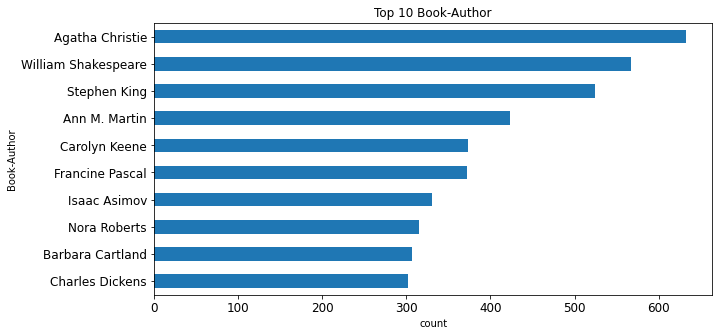

In [14]:
#ploting top 10 author
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = book_df['Book-Author'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Author', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Author')
plt.show()

Observation
* We have 1,02,020 unique Author.
* The top most author found is Agatha Christie.
* We have 632 Agatha Christie in books data.

**Publisher**

In [15]:
#describing publisher column of book data
book_df['Publisher'].describe()

count        271358
unique        16807
top       Harlequin
freq           7535
Name: Publisher, dtype: object

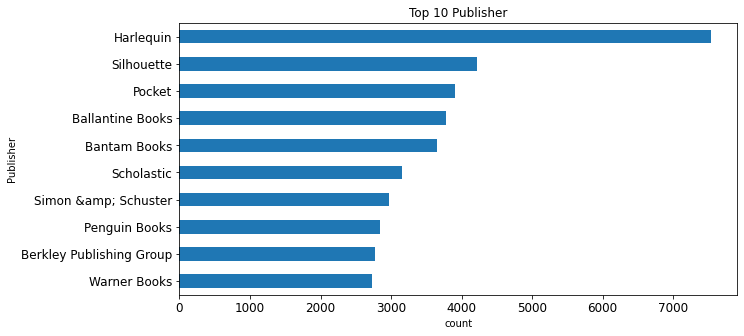

In [16]:
#ploting top 10 publisher
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = book_df['Publisher'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Publisher', fontsize=12)
plt.xlabel('count')
plt.ylabel('Publisher')
plt.show()

Observation
* We have 16,803 unique Publishers.
* The top most Publishers found is Harlequin.
* We have 7,535 Harlequin in books data.

**Year Of Publication**

In [17]:
#describing year of publication
book_df['Year-Of-Publication'].describe()

count     271360
unique       202
top         2002
freq       13903
Name: Year-Of-Publication, dtype: int64

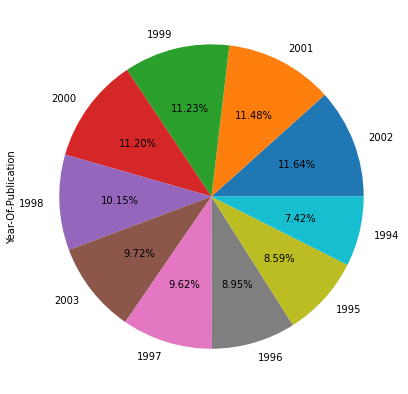

In [18]:
#ploting year of publishing 
fig= plt.figure(figsize=(15,7))
book_df['Year-Of-Publication'].value_counts().head(10).plot(kind='pie', autopct='%1.2f%%')
plt.show()

Observation
* Most books were published in the year of 2002.

**Location**

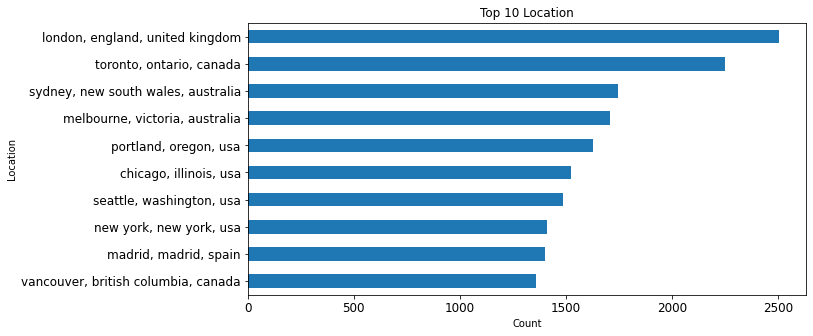

In [19]:
#ploting top  10 location
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = users_df['Location'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Location', fontsize=12)
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

**Age**

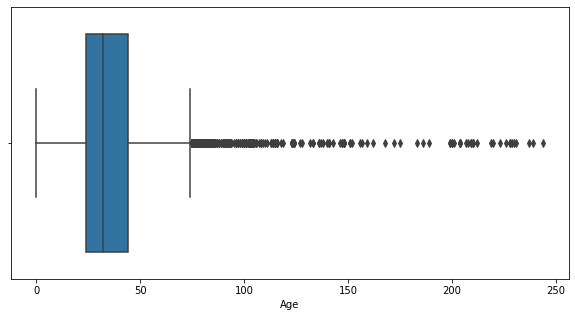

In [20]:
# Checking the Outliers in Age.
plt.figure(figsize = (10,5))
sns.boxplot(users_df.Age)
plt.xlabel('Age')
plt.show()

Observation
* Here we are having some outliers. Let's fix it.

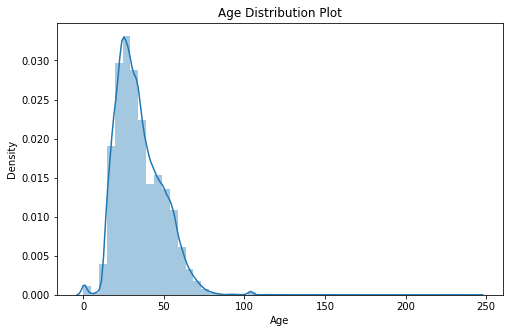

In [21]:
plt.figure(figsize=(8, 5))
sns.distplot(users_df.Age)
plt.title('Age Distribution Plot')
plt.show()

**Handling Outliers**

Remove the Age greater than 90 and less than 8.

In [22]:
# First we are filling the nan value where the age is greater than 90 and less than 8 then replacing the nan with mean value.
users_df.loc[(users_df['Age'] > 90) | (users_df['Age'] < 8), 'Age']= np.NAN
users_df['Age']= users_df['Age'].fillna(users_df['Age'].mean())
users_df['Age']= users_df['Age'].astype(np.int32)

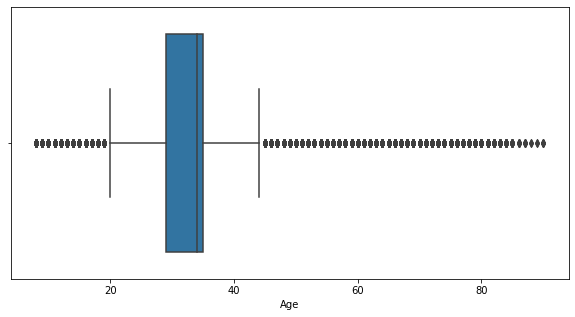

In [23]:
plt.figure(figsize = (10,5))
sns.boxplot(users_df.Age)
plt.xlabel('Age')
plt.show()

**Book-Rating**

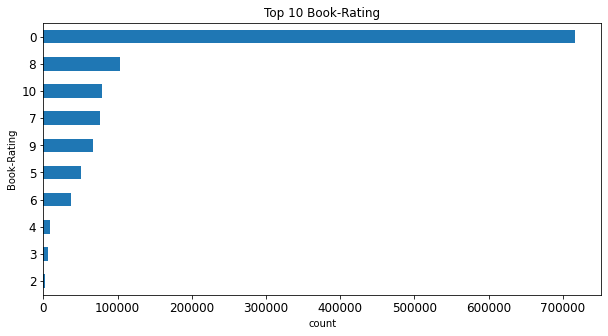

In [24]:
# Checking the ratings.
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = ratings_df['Book-Rating'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Rating', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Rating')
plt.show()

Observation
* Highest rating is 8 out of 10.
* Lowest rating is 2 out of 10.
* Most of the people haven't given the ratings.

Check the number of users who have given the rating.

In [25]:
#checking the no. of row in User_id Column in User Data 
users_df['User-ID'].shape

(278858,)

In [26]:
#checking the no. of row in User_id Column in Rating Data 
ratings_df['User-ID'].value_counts().shape

(105283,)

Observation
* Out of 2,78,858 users only 1,05,283 users who have given the ratings.

# **Collaborative Filtering**

Collaborative filtering (CF) is a technique used by recommender systems.In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating).

In [27]:
#viewing top 5 row of user Data
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


## **Collaborative Filtering Using k-Nearest Neighbors (kNN)**

kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user.

First, we need to find out the average rating, and the number of ratings each book received.

In [28]:
#creating Dataframe to find the average rating of each book grouping by ISBN number
average_rating = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False)

,Book-Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
...,...,...
0801064090,0.000000,1
0801064252,5.000000,1
0801064279,0.000000,1


observation
* In this data set, the book that received most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

##**Note**
**To ensure statistical significance, We will consider only those books in which atleast 50 ratings have been given by the users and users who have given atleast 50 ratings**

In [29]:
counts = ratings_df['Book-Rating'].value_counts()
ratings_df = ratings_df[ratings_df['Book-Rating'].isin(counts[counts >= 50].index)]
counts1 = ratings_df['User-ID'].value_counts()
ratings_df = ratings_df[ratings_df['User-ID'].isin(counts1[counts1 >= 50].index)]


Merging the two dataset (ratings data and books data.)

In [30]:
#merging both DF on ISBN number
combine_book_rating = pd.merge(ratings_df, book_df, on='ISBN')
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
#droping extra columns
combine_book_rating = combine_book_rating.drop(columns, axis=1)
#viewing top 20 row of merged DF
combine_book_rating.head(20)

,User-ID,ISBN,Book-Rating,Book-Title
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels)
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels)
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels)
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels)
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels)
5,9177,0446364193,7,Along Came a Spider (Alex Cross Novels)
6,11400,0446364193,0,Along Came a Spider (Alex Cross Novels)
7,11676,0446364193,8,Along Came a Spider (Alex Cross Novels)
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels)
9,15418,0446364193,0,Along Came a Spider (Alex Cross Novels)


In [31]:
#droping columns where Book title is Null
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])

We then group by book titles and create a new column for total rating count.

In [32]:
book_ratingCount = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'TotalRatingCount'})
     [['Book-Title', 'TotalRatingCount']]
    )
book_ratingCount.head()

,Book-Title,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


Combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [33]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198


In [34]:
#describing the new data
rating_with_totalRatingCount['TotalRatingCount'].describe()

count    703434.000000
mean         35.008956
std          68.959965
min           1.000000
25%           2.000000
50%           8.000000
75%          34.000000
max         852.000000
Name: TotalRatingCount, dtype: float64

In [35]:
# Converting the values into float data type.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# It provides the descriptive statistcs of the data.
print(book_ratingCount['TotalRatingCount'].describe())

count   199187.00
mean         3.53
std         10.54
min          1.00
25%          1.00
50%          1.00
75%          3.00
max        852.00
Name: TotalRatingCount, dtype: float64


observation
* The median book has been rated only once. 

Let’s look at from 90% to 99% to identify the TotalRatingCounts for each of the quantile.

In [36]:
print(book_ratingCount['TotalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.90    6.00
0.91    7.00
0.92    7.00
0.93    8.00
0.94    9.00
0.95   11.00
0.96   13.00
0.97   17.00
0.98   23.00
0.99   39.00
Name: TotalRatingCount, dtype: float64


observation
* We can see about 99% of books received below 39 ratings.
* Only about 1% of books recieved 39 or more ratings.

As we have so many books in our data, we will limit to above 30 ratings only.

In [37]:
# Limiting TotalRatingCount above 30 ratings.
popularity_threshold = 30
rating_popular_book = rating_with_totalRatingCount.query('TotalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),198
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),198
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198


In [38]:
# Checking the total size of rating_popular_book.
rating_popular_book.shape

(192670, 5)

Check the number of unique books with respect to the ISBN

In [39]:
rating_popular_book['ISBN'].nunique()

7653

# **Filter to users in US**

In order to improve computing speed, and not run into the 'MemoryError' issue we will limit our users data to those in the US. Then combine the user data with rating data and total rating count data.

In [40]:
combined = rating_popular_book.merge(users_df, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

us_user_rating = combined[combined['Location'].str.contains("usa")]
us_user_rating=us_user_rating.drop('Age', axis=1)
us_user_rating

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount,Location
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"omaha, nebraska, usa"
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"sunnyvale, california, usa"
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"los angeles, california, usa"
8,14521,0446364193,0,Along Came a Spider (Alex Cross Novels),198,"providence, rhode island, usa"
10,16795,0446364193,8,Along Came a Spider (Alex Cross Novels),198,"mechanicsville, maryland, usa"
...,...,...,...,...,...,...
192665,275970,051756338X,0,Sarum: The Novel of England,45,"pittsburgh, pennsylvania, usa"
192666,275970,0865714215,0,Stormy Weather,59,"pittsburgh, pennsylvania, usa"
192667,275970,1586210661,9,Me Talk Pretty One Day,257,"pittsburgh, pennsylvania, usa"
192668,276688,0517145553,0,Mostly Harmless,30,"fort lee, new jersey, usa"


Remove the duplicates present in rating popular book data.

In [41]:
if not rating_popular_book[rating_popular_book.duplicated(['User-ID', 'Book-Title'])].empty:

    # Identifying number of rows corresponding to the US.
    print('Actual rating_popular_book shape {0}'.format(rating_popular_book.shape))

    rating_popular_book = rating_popular_book.drop_duplicates(['User-ID', 'Book-Title'])

    # Identifying number of rows corresponding to the US duplicates.
    print('Rating_popular_book shape after removing the duplicates  {0}'.format(rating_popular_book.shape))

Actual rating_popular_book shape (192670, 5)
Rating_popular_book shape after removing the duplicates  (189333, 5)


# **Implementing kNN**

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “auto”, and we specify “metric=minkowski”. Finally, we fit the model.

At first create a pivote table.

In [42]:
#creating Pivot Table
from scipy.sparse import csr_matrix
us_user_rating_pivot = rating_popular_book.pivot(index = 'Book-Title',columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_user_rating_matrix = csr_matrix(us_user_rating_pivot.values)

**Finding the Nearest Neighbors**

In [43]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

**Test our model and make few recommendation**

In [44]:
query_index = np.random.choice(us_user_rating_pivot.shape[0])
print(query_index)


1951


In [45]:
distances, indices = model_knn.kneighbors(us_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [46]:
us_user_rating_pivot.index[query_index]

'Switcheroo : A Novel'

In [47]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Switcheroo : A Novel:

1: Marrying Mom, with distance of 0.47814296308241:
2: The Bestseller, with distance of 0.6477664899325236:
3: Young Wives, with distance of 0.7178066281053082:
4: SMART WOMEN : A Story of Hope, with distance of 0.7599666597206143:
5: Tell Me Lies (Tell Me Lies), with distance of 0.7693589730984691:


**We are only considering those ratings that are not eqaul to 0.**

In [48]:
#shape of US based User
us_user_rating.shape

(151815, 6)

In [49]:
# Ratings that are not 0.
us_user_rating= us_user_rating[us_user_rating['Book-Rating'] != 0]

In [50]:
us_user_rating.shape

(42020, 6)

In [51]:
us_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount,Location
10,16795,0446364193,8,Along Came a Spider (Alex Cross Novels),198,"mechanicsville, maryland, usa"
12,18082,0446364193,7,Along Came a Spider (Alex Cross Novels),198,"southern, california, usa"
13,19085,0446364193,8,Along Came a Spider (Alex Cross Novels),198,"menomonie, wisconsin, usa"
14,21031,0446364193,10,Along Came a Spider (Alex Cross Novels),198,"alexandria, virginia, usa"
18,28177,0446364193,7,Along Came a Spider (Alex Cross Novels),198,"grand rapids, michigan, usa"


# **Filtering users with atleast 10 interaction**

In [52]:
users_interactions_count_df = us_user_rating.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('Number of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 10].reset_index()[['User-ID']]
print('Number of users with at least 10 interactions: %d' % len(users_with_enough_interactions_df))

Number of users: 2022
Number of users with at least 10 interactions: 1310


In [53]:
print('Number of interactions: %d' % len(us_user_rating))
interactions_from_selected_users_df = us_user_rating.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('Number of interactions from users with at least 10 interactions: %d' % len(interactions_from_selected_users_df))

Number of interactions: 42020
Number of interactions from users with at least 10 interactions: 38473


In [54]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount,Location
0,243,0446606383,6,The Midnight Club,73,"arden hills, minnesota, usa"
1,243,0316776963,9,Me Talk Pretty One Day,257,"arden hills, minnesota, usa"
2,243,0375400117,10,Memoirs of a Geisha,47,"arden hills, minnesota, usa"
3,243,0449006522,6,Manhattan Hunt Club,58,"arden hills, minnesota, usa"
4,243,0316601950,9,The Pilot's Wife : A Novel,290,"arden hills, minnesota, usa"
5,243,044023722X,7,A Painted House,390,"arden hills, minnesota, usa"
6,243,0446364800,9,The General's Daughter,104,"arden hills, minnesota, usa"
7,243,0316899984,7,"River, Cross My Heart",125,"arden hills, minnesota, usa"
8,243,0060915544,10,The Bean Trees,208,"arden hills, minnesota, usa"
9,243,0060977493,7,The God of Small Things,153,"arden hills, minnesota, usa"


## **We are applying log transformation to smooth the distribution!!**

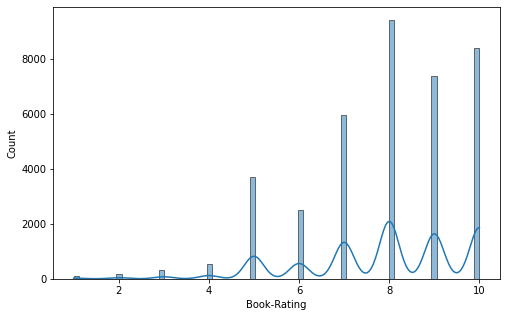

In [55]:
# Before log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

In [56]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

Number of unique user/item interactions: 38473


,ISBN,User-ID,Book-Rating
0,0020198906,7346,3.17
1,0020198906,14422,3.32
2,0020198906,108352,3.00
3,0020198906,140036,3.17
4,0020198906,157273,3.17


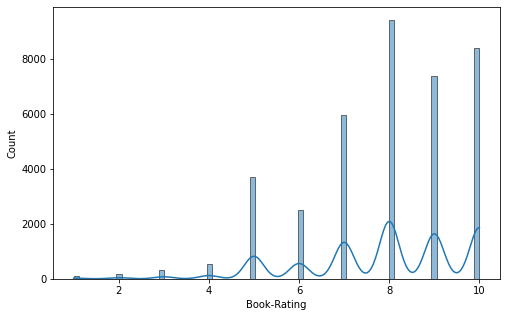

In [57]:
# After log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()